# Horizontal and vertical derivatives

### This notebook ilustrate how to calculate the $n$ order derivatives in the Fourier domain. Here, we calculate $\partial_x \, \mathcal{P}$, $\partial_y \, \mathcal{P}$ and also $\partial_z \, \mathcal{P}$, once $\, \mathcal{P}$ is assumed as the transformed potential data, which has wavenumbers $K_x$ and $K_y$ in both horizontal directions and $K_z$ is calculated by $\sqrt{K_x^2 + K_y^2}$.

### Let $\mathcal{F}\left[\mathcal{P}(x,y)\right]$ be the transformed potential data, which can be written as:

# $$\mathcal{F}\left[\mathcal{P}(x,y)\right] = \int \mathcal{P}(x,y)\, e^{-i(K_{x}x \, + \, K_ {y}y)}\, dx\,dy$$

### The horizontal derivatives are calculated in $x$ direction by:
# $$\dfrac{\partial \mathcal{P}}{\partial x} = (i\, k_x)\, \mathcal{F}\left[\mathcal{P}(x,y)\right]$$
### and in $y$ direction by
# $$\dfrac{\partial \mathcal{P}}{\partial y} = (i\, k_y)\, \mathcal{F}\left[\mathcal{P}(x,y)\right]$$

### The calculated vertical derivative can be done by using:
# $$\dfrac{\partial \mathcal{P}}{\partial x} = \left(\sqrt{K_x^2 + K_y^2}\right)\, \mathcal{F}\left[\mathcal{P}(x,y)\right]$$

### If we want to calculate the second order derivative in $x$ direction, for example, we multiply the transformed data by $(i\, k_x)^2$. This process is the same for other second order derivatives ($y$ and $z$ directions) and also for a $n$-order.

In [1]:
# Copying all usefull libraries
import numpy as np
import matplotlib.pyplot as plt

## Synthetic Magnetic data

In [2]:
# Definition for number of points and grid creation
npts = 500
x = np.linspace(-2000., 2000., npts)
y = np.copy(x)
z = -100.

# Creat the grid file
X, Y = np.meshgrid(x, y)

In [10]:
#Informations about the rectangular prisms that we will use
prism = [-500., 500., -500., 500., 100., 600., 0.73]

# Informations about the values for inclination and declination
incf, decf = 55., -30.

In [11]:
# Importing
from codes.prism import prism_tf
from codes.auxiliars import addnoise
from codes.statistical import analysis

In [12]:
# Calculate the total field anomaly
tf = prism_tf(X, Y, z, prism, incf, decf)

In [13]:
# Analyzing
_ = analysis(tf, 'nT')

Minimum:    -71.9013 nT
Maximum:    186.2700 nT
Mean value: 3.0997 nT
Variation:  258.1713 nT


In [14]:
# Adding noise
tfa = addnoise(tf, 1., 0.15)

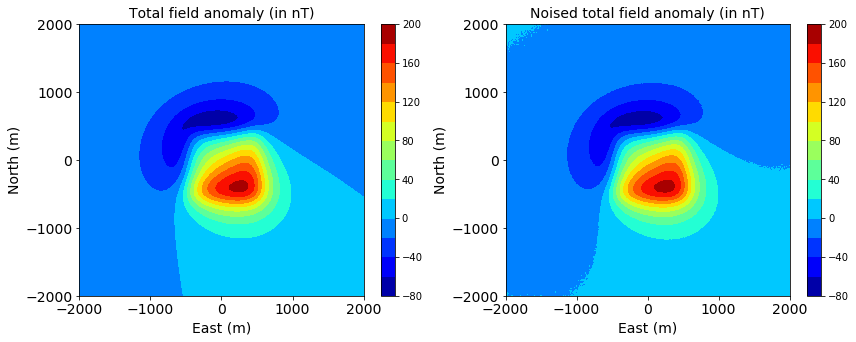

In [15]:
# Plotting the total field anomaly
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Total field anomaly (in nT)', fontsize = 14)
plt.contourf(Y, X, tf, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Noised total field anomaly (in nT)', fontsize = 14)
plt.contourf(Y, X, tfa, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.savefig('figures/deriv01-totalfield.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [16]:
# Importing derivatives module
from codes import derivative

In [17]:
# Calculating the first order horizontal derivative in X direction
derivx = derivative.xderiv(x, y, tfa)

# Calculating the first order horizontal derivative in Y direction
derivy = derivative.yderiv(x, y, tfa)

# Calculating the first order vertical derivative in Z direction
derivz = derivative.zderiv(x, y, tfa)

In [18]:
# Calculating the numerical derivative
delta = 10.
# In X
xi = prism_tf(X - delta, Y, z, prism, incf, decf)
xf = prism_tf(X + delta, Y, z, prism, incf, decf)
diffx = (xf - xi)/(2.*delta)

# In Y
yi = prism_tf(X, Y - delta, z, prism, incf, decf)
yf = prism_tf(X, Y + delta, z, prism, incf, decf)
diffy = (yf - yi)/(2.*delta)

# In X
zi = prism_tf(X, Y, z - 0.1*delta, prism, incf, decf)
zf = prism_tf(X, Y, z + 0.1*delta, prism, incf, decf)
diffz = (zf - zi)/(2.*0.1*delta)

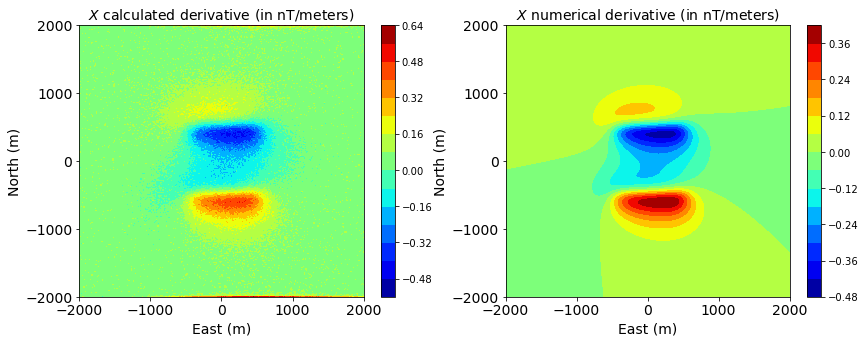

In [19]:
# Plotting the results for x derivative
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.title('$X$ calculated derivative (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, derivx, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('$X$ numerical derivative (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, diffx, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.savefig('figures/deriv02-xderivative.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

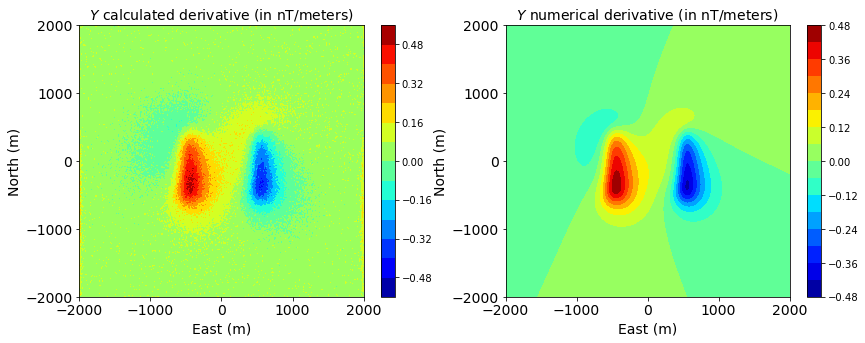

In [21]:
# Plotting the results for y derivative
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.title('$Y$ calculated derivative (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, derivy, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('$Y$ numerical derivative (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, diffy, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.savefig('figures/deriv03-y-derivative.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

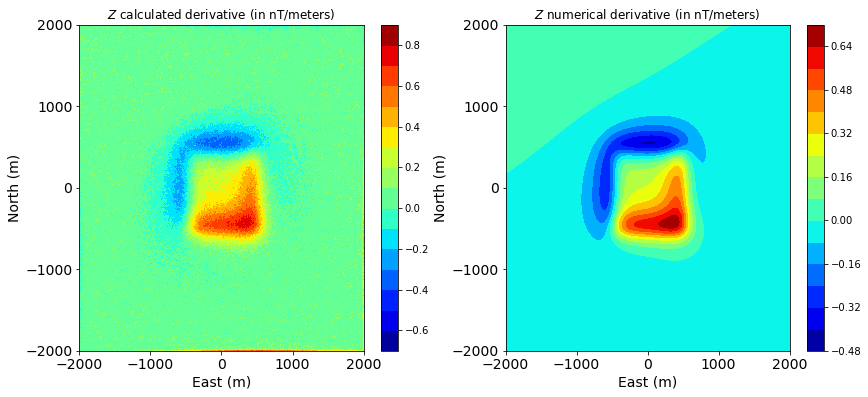

In [22]:
# Plotting the results for y derivative
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title('$Z$ calculated derivative (in nT/meters)')
plt.contourf(Y, X, derivz, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('$Z$ numerical derivative (in nT/meters)')
plt.contourf(Y, X, diffz, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.savefig('figures/deriv04-z-derivative.png', facecolor='w', edgecolor='w', bbox_inches='tight')

plt.show()

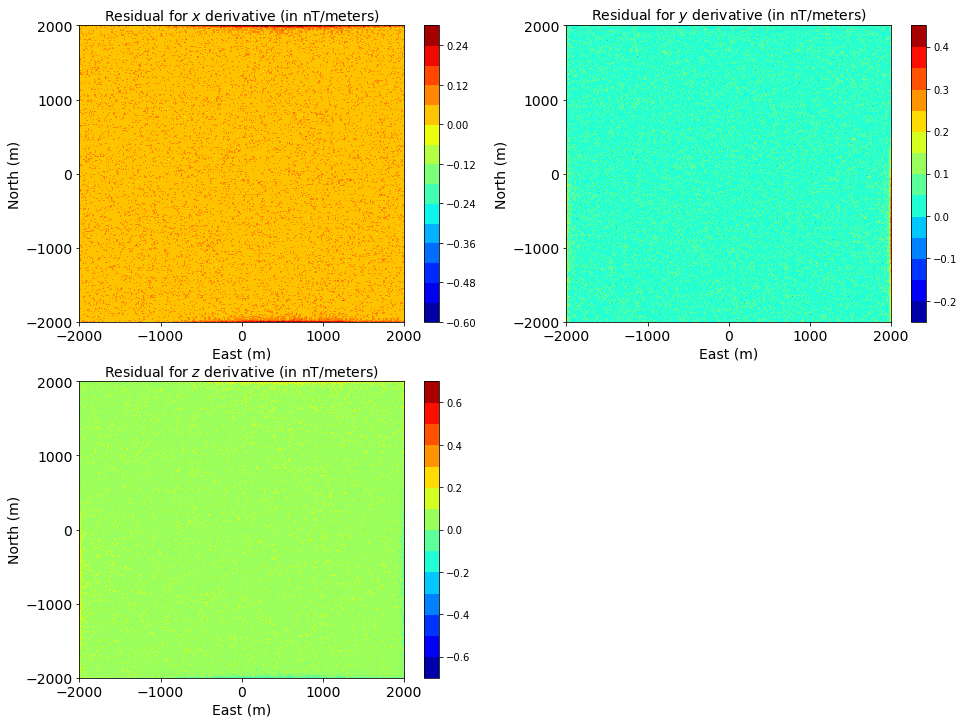

In [24]:
# Plotting the results for y derivative
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
plt.title('Residual for $x$ derivative (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, diffx - derivx, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Residual for $y$ derivative (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, diffy - derivy, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Residual for $z$ derivative (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, diffz - derivz, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.savefig('figures/deriv05-residual.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [25]:
# Testing for horizontal gradient
hg_calc = np.sqrt(diffx**2 + diffy**2)
hg_four = np.sqrt(derivx**2 + derivy**2)

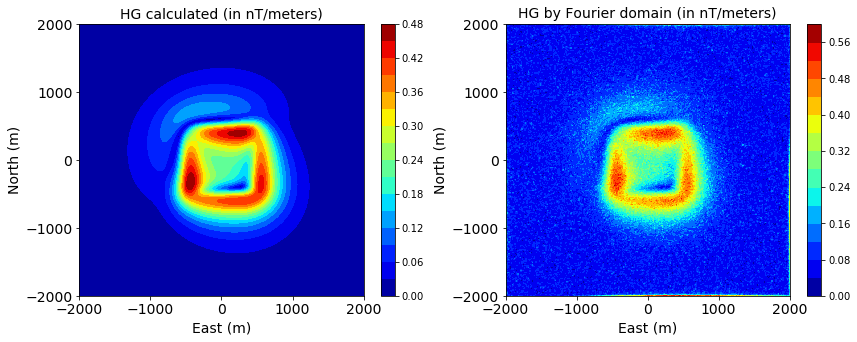

In [27]:
# Plotting the results for horizontal gradient
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.title('HG calculated (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, hg_calc, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('HG by Fourier domain (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, hg_four, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.savefig('figures/deriv06-horizontal-grad.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [28]:
# Testing for total gradient
tg_calc = np.sqrt(diffx**2 + diffy**2 + diffz**2)
tg_four = np.sqrt(derivx**2 + derivy**2 + derivz**2)

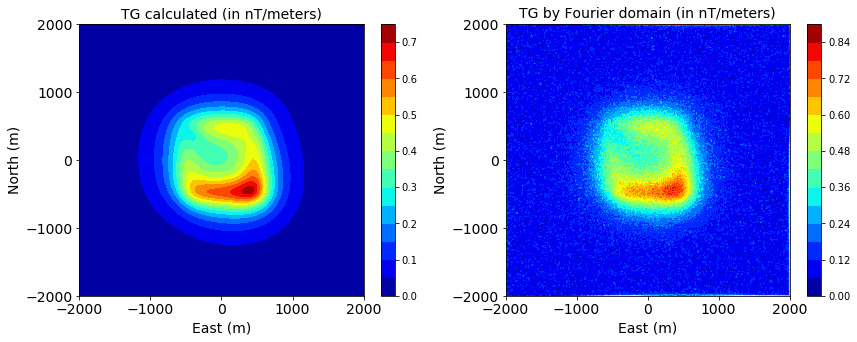

In [30]:
# Plotting the results for total gradient
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('TG calculated (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, tg_calc, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('TG by Fourier domain (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, tg_four, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.savefig('figures/deriv07-total-grad.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

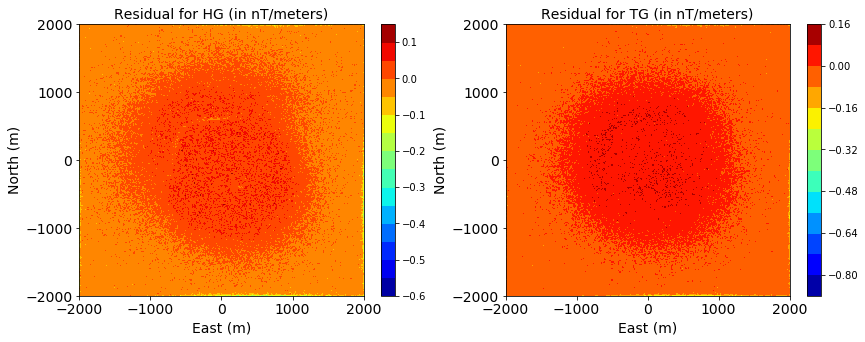

In [31]:
# Plotting the errors
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('Residual for HG (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, hg_calc - hg_four, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Residual for TG (in nT/meters)', fontsize = 14)
plt.contourf(Y, X, tg_calc - tg_four, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5),fontsize = 14)
plt.yticks(np.linspace(y.min(), y.max(), 5),fontsize = 14)
plt.colorbar()

plt.savefig('figures/deriv08-residual.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()